<a href="https://colab.research.google.com/github/jayantapy/Covid-Data-Analysis-of-Germany/blob/main/COVID_EDA_of_Germany_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### DATA CLEANING

Confirmed cases

In [ ]:
df1=pd.read_csv(r"https://github.com/jgehrcke/covid-19-germany-gae/blob/master/cases-rki-by-state.csv?raw=true")
df1=df1.iloc[:383] # the data set gets updated daily. Thus we need to limit the entries in dataframe to derive meaningful conclusions
total_confirmed_cases=df1.iloc[382]['sum_cases'] # total confirmed cases as on 19.03.2021
latest_confirmed_per_state=df1.iloc[382] # total confirmed cases in each state
df1 # cumulative dataset

,time_iso8601,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH,sum_cases
0,2020-03-02T17:00:00+0000,2,0,30,34,2,9,2,0,4,116,2,4,3,1,0,0,209
1,2020-03-03T17:00:00+0000,2,6,54,40,4,13,5,2,10,145,3,5,3,1,0,1,294
2,2020-03-04T17:00:00+0000,2,9,92,50,4,15,6,4,14,235,7,5,3,1,0,1,448
3,2020-03-05T17:00:00+0000,4,19,128,69,4,21,11,5,20,332,8,6,3,1,0,1,632
4,2020-03-06T17:00:00+0000,4,24,179,120,4,22,14,5,27,394,10,8,3,3,0,1,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021-03-15T17:00:00+0000,80402,135504,333307,460268,19063,199427,55490,26901,177463,561298,107149,45450,30131,204063,65411,83448,2584775
379,2021-03-16T17:00:00+0000,80927,136138,335439,462911,19162,200691,55918,27191,178661,564383,107676,45764,30265,205312,65841,84235,2600514
380,2021-03-17T17:00:00+0000,81465,136880,337630,465910,19311,202248,56333,27398,180390,568558,108335,46094,30366,206504,66324,85051,2618797
381,2021-03-18T17:00:00+0000,82080,137628,339576,468484,19447,203523,56699,27580,181869,571969,108876,46385,30497,207878,66962,85868,2635321


In [ ]:
state_data = pd.DataFrame(df1.loc[382])
state_data.drop(['time_iso8601','sum_cases'],inplace = True)
state_data.columns = ['Total Confirmed Cases']
state_data.rename_axis('States').reset_index()
state_data['Total Confirmed Cases'].sort_values(ascending=False)

DE-NW    575204
DE-BY    470846
DE-BW    341487
DE-SN    209013
DE-HE    204866
DE-NI    183209
DE-BE    138172
DE-RP    109503
DE-TH     86692
DE-BB     82532
DE-ST     67419
DE-HH     57014
DE-SH     46668
DE-SL     30587
DE-MV     27797
DE-HB     19563
Name: Total Confirmed Cases, dtype: object

In [ ]:
df1.info() # checking column data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time_iso8601  383 non-null    object
 1   DE-BB         383 non-null    int64 
 2   DE-BE         383 non-null    int64 
 3   DE-BW         383 non-null    int64 
 4   DE-BY         383 non-null    int64 
 5   DE-HB         383 non-null    int64 
 6   DE-HE         383 non-null    int64 
 7   DE-HH         383 non-null    int64 
 8   DE-MV         383 non-null    int64 
 9   DE-NI         383 non-null    int64 
 10  DE-NW         383 non-null    int64 
 11  DE-RP         383 non-null    int64 
 12  DE-SH         383 non-null    int64 
 13  DE-SL         383 non-null    int64 
 14  DE-SN         383 non-null    int64 
 15  DE-ST         383 non-null    int64 
 16  DE-TH         383 non-null    int64 
 17  sum_cases     383 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 54.0+ KB


In [ ]:
# cleaning dataset
date_only=pd.to_datetime(df1['time_iso8601']).dt.date # extracting date from date time object
df1['time_iso8601']=pd.to_datetime(date_only) # assigning it to column in dataframe
df1.rename(columns={'time_iso8601':'Date'},inplace=True) # renaming columns

# columns with numerical values
num_columns=['DE-BB', 'DE-BE', 'DE-BW', 'DE-BY', 'DE-HB', 'DE-HE', 'DE-HH',
       'DE-MV', 'DE-NI', 'DE-NW', 'DE-RP', 'DE-SH', 'DE-SL', 'DE-SN', 'DE-ST',
       'DE-TH', 'sum_cases']

i=382
while i>0 :
  df1.loc[i,num_columns]=df1.loc[i,num_columns]-df1.loc[i-1,num_columns]
  i-=1
df1

,Date,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH,sum_cases
0,2020-03-02,2,0,30,34,2,9,2,0,4,116,2,4,3,1,0,0,209
1,2020-03-03,0,6,24,6,2,4,3,2,6,29,1,1,0,0,0,1,85
2,2020-03-04,0,3,38,10,0,2,1,2,4,90,4,0,0,0,0,0,154
3,2020-03-05,2,10,36,19,0,6,5,1,6,97,1,1,0,0,0,0,184
4,2020-03-06,0,5,51,51,0,1,3,0,7,62,2,2,0,2,0,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021-03-15,155,670,694,974,52,530,239,70,554,1267,266,129,-33,639,153,333,6692
379,2021-03-16,525,634,2132,2643,99,1264,428,290,1198,3085,527,314,134,1249,430,787,15739
380,2021-03-17,538,742,2191,2999,149,1557,415,207,1729,4175,659,330,101,1192,483,816,18283
381,2021-03-18,615,748,1946,2574,136,1275,366,182,1479,3411,541,291,131,1374,638,817,16524


Death cases

In [ ]:
df_deaths=pd.read_csv(r"https://github.com/jgehrcke/covid-19-germany-gae/blob/master/deaths-rki-by-state.csv?raw=true")
df_deaths=df_deaths.iloc[:383] # the data set gets updated daily. Thus we need to limit the entries in dataframe to derive meaningful conclusions
total_death_cases=df_deaths.iloc[382]['sum_deaths']
latest_deaths_per_state=df_deaths.iloc[382]
df_deaths.tail()

,time_iso8601,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH,sum_deaths
378,2021-03-15T17:00:00+0000,3232,2987,8519,12970,392,6148,1347,825,4716,13890,3252,1404,917,8219,2628,3194,74640
379,2021-03-16T17:00:00+0000,3234,2988,8522,12972,392,6153,1349,826,4719,13893,3252,1405,917,8219,2628,3197,74666
380,2021-03-17T17:00:00+0000,3235,2989,8525,12978,392,6154,1349,826,4721,13897,3254,1405,917,8219,2630,3198,74689
381,2021-03-18T17:00:00+0000,3235,2989,8528,12980,392,6155,1349,826,4723,13897,3256,1405,918,8220,2631,3198,74702
382,2021-03-19T17:00:00+0000,3235,2991,8530,12980,392,6156,1349,826,4724,13897,3256,1405,918,8220,2632,3199,74710


In [ ]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time_iso8601  383 non-null    object
 1   DE-BB         383 non-null    int64 
 2   DE-BE         383 non-null    int64 
 3   DE-BW         383 non-null    int64 
 4   DE-BY         383 non-null    int64 
 5   DE-HB         383 non-null    int64 
 6   DE-HE         383 non-null    int64 
 7   DE-HH         383 non-null    int64 
 8   DE-MV         383 non-null    int64 
 9   DE-NI         383 non-null    int64 
 10  DE-NW         383 non-null    int64 
 11  DE-RP         383 non-null    int64 
 12  DE-SH         383 non-null    int64 
 13  DE-SL         383 non-null    int64 
 14  DE-SN         383 non-null    int64 
 15  DE-ST         383 non-null    int64 
 16  DE-TH         383 non-null    int64 
 17  sum_deaths    383 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 54.0+ KB


In [ ]:
# columns with numerical values
num_columns_death=['DE-BB', 'DE-BE', 'DE-BW', 'DE-BY', 'DE-HB', 'DE-HE', 'DE-HH',
       'DE-MV', 'DE-NI', 'DE-NW', 'DE-RP', 'DE-SH', 'DE-SL', 'DE-SN', 'DE-ST',
       'DE-TH', 'sum_deaths']

date_only=pd.to_datetime(df_deaths['time_iso8601']).dt.date
df_deaths['time_iso8601']=pd.to_datetime(date_only) # assigning it to column in dataframe
df_deaths.rename(columns={'time_iso8601':'Date'},inplace=True) 

i=df_deaths.shape[0]-1
while i>0 :
    df_deaths.loc[i,num_columns_death]=df_deaths.loc[i,num_columns_death]-df_deaths.loc[i-1,num_columns_death]
    i-=1
    
df_deaths

,Date,DE-BB,DE-BE,DE-BW,DE-BY,DE-HB,DE-HE,DE-HH,DE-MV,DE-NI,DE-NW,DE-RP,DE-SH,DE-SL,DE-SN,DE-ST,DE-TH,sum_deaths
0,2020-03-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-04,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2
3,2020-03-05,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2020-03-06,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021-03-15,3,2,1,4,0,6,1,1,0,2,2,1,0,1,2,1,27
379,2021-03-16,2,1,3,2,0,5,2,1,3,3,0,1,0,0,0,3,26
380,2021-03-17,1,1,3,6,0,1,0,0,2,4,2,0,0,0,2,1,23
381,2021-03-18,0,0,3,2,0,1,0,0,2,0,2,0,1,1,1,0,13


Both confirmed and death cases

In [ ]:
# dataframe containing daily confirmed cases and death cases
total_data=pd.concat([df1[['Date','sum_cases']],df_deaths[['sum_deaths']]],axis=1)
total_data

,Date,sum_cases,sum_deaths
0,2020-03-02,209,0
1,2020-03-03,85,0
2,2020-03-04,154,2
3,2020-03-05,184,1
4,2020-03-06,186,4
...,...,...,...
378,2021-03-15,6692,27
379,2021-03-16,15739,26
380,2021-03-17,18283,23
381,2021-03-18,16524,13


In [ ]:
# dictionary containing state codes in columns as keys and their actual names
list_of_states={ 'DE-BW':'Baden-Württemberg','DE-BY':'Bavaria','DE-BE':'Berlin','DE-BB':'Brandenburg',
                 'DE-HB':'Bremen','DE-HH':'Hamburg','DE-HE':'Hesse','DE-NI':'Lower Saxony',
                 'DE-MV':'Mecklenburg-Vorpommern','DE-NW':'North Rhine-Westphalia','DE-RP':'Rhineland-Palatinate',
                 'DE-SL':'Saarland','DE-SN':'Saxony','DE-ST':'Saxony-Anhalt','DE-SH':'Schleswig-Holstein',
                 'DE-TH':'Thuringia'
                }

### DATA VISUALIZATION ON COUNTRY DATA

In [ ]:
fig=px.line(total_data,x='Date',y='sum_cases',title='Daily confirmed cases')
fig.show()

### MORTALITY RATE FOR COVID 19

In [ ]:
# mortality rate from our dataset
MR=total_death_cases*100/total_confirmed_cases
MR

2.818636882906784

In [ ]:
# mortality rate from WHO data as on 19.03.2021
confirmed_cases_WHO=2645783
death_cases_WHO=74565
MR_WHO=death_cases_WHO*100/confirmed_cases_WHO
MR_WHO

2.8182583378909003

### EXPLORATORY DATA ANALYSIS

1. Contribution of each state to Covid cases in Germany

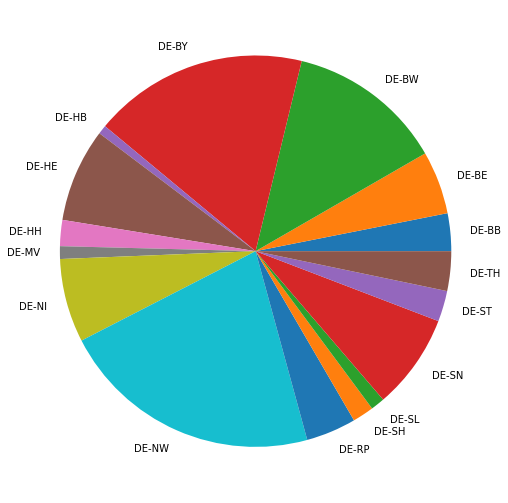

In [ ]:
plt.pie(state_data['Total Confirmed Cases'],labels=state_data.index)
plt.gcf().set_size_inches(13, 9)

The state of North Rhine-Westphalia (DE-NW) contributes the most to total covid cases in the country.

2. Compare mortality rate for each state

---






In [ ]:
MR_per_state=(latest_deaths_per_state[num_columns_death]*100)/latest_confirmed_per_state[num_columns] # Mortality rate per state
del MR_per_state['sum_cases'] # deleting unwanted data
del MR_per_state['sum_deaths'] # deleting unwanted data
MR_per_state=pd.DataFrame(MR_per_state).reset_index() 
MR_per_state.rename(columns={382:'Mortality Rate','index':'State code'},inplace=True)
MR_per_state

,State code,Mortality Rate
0,DE-BB,3.91969
1,DE-BE,2.16469
2,DE-BW,2.4979
3,DE-BY,2.75674
4,DE-HB,2.00378
5,DE-HE,3.00489
6,DE-HH,2.36609
7,DE-MV,2.97154
8,DE-NI,2.57848
9,DE-NW,2.41601


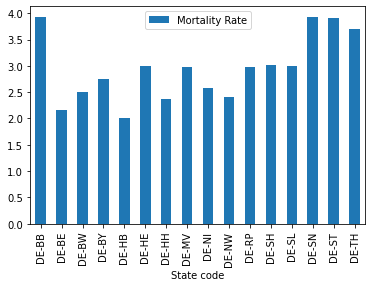

In [ ]:
# plotting mortality rate for different states
MR_per_state.plot.bar(x='State code',y='Mortality Rate')

We can see that 'Saxony' has the highest mortality rate of 3.935 among all German states while 'Bremen' has the lowest rate of 2.0. This indicates that the state of Saxony needs to do better covid tracing and treatment to improve the state mortality rate.



3. Compare total covid cases in each month

---






In [ ]:
cases_per_month=(total_data.set_index('Date'). # use date-time as index
                assign(month=lambda x: x.index.month). # add new column with month
                groupby('month'). # group by that column
                sum() # find sum of cases in a particular month
                ) 
cases_per_month

,sum_cases,sum_deaths
month,,
1,467526,18435
2,224496,5595
3,276264,3645
4,88298,5690
5,19859,681
6,12928,143
7,15167,139
8,34493,114
9,49323,321


The month of December contributed a large number of covid cases because the lockdown in the country from November was less stringent and there was a delay in case reporting from 'Saxony'(state with large number of covid cases). Note that we took data from beginning of March 2020 to 19th March 2021. Even though we took data for more than one year, December cases remains the highest.

### DATA VISUALIZATION OF COVID DATA FOR EACH STATE

In [ ]:
# function to visualize time series data by taking two state codes as input parameters
def viz(state1,state2):
  df1.plot.line(x='Date',y=[state1,state2])
  plt.gcf().set_size_inches(13, 5)

North Rhine-Westphalia (DE-NW) and Bavaria (DE-BY)

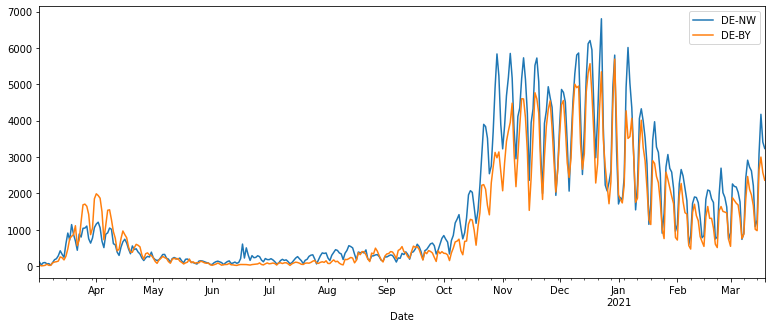

In [ ]:
viz('DE-NW','DE-BY')

Baden-Württemberg (DE-BW) and Saxony (DE-SN)

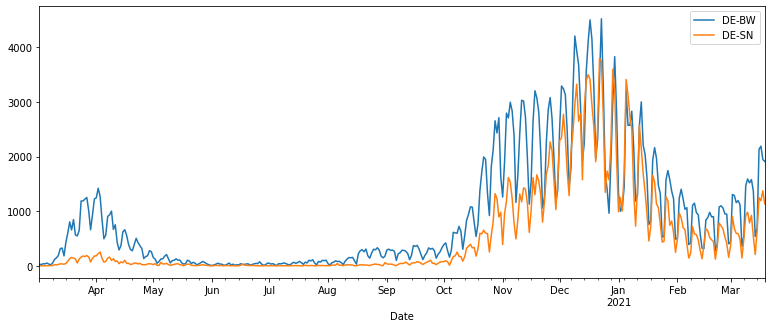

In [ ]:
viz('DE-BW','DE-SN')

Hesse (DE-HE) and Lower Saxony (DE-NI)

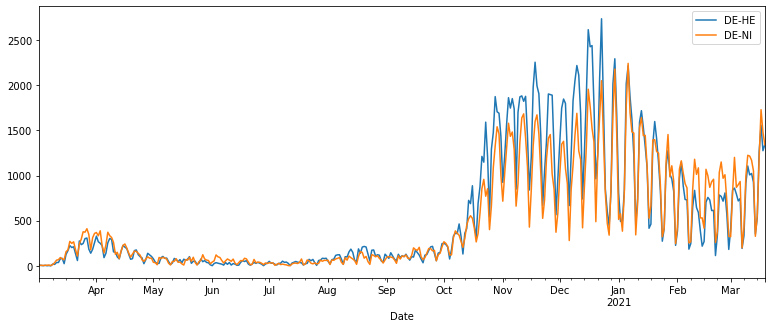

In [ ]:
viz('DE-HE','DE-NI')

Berlin (DE-BE) and Rhineland-Palatinate (DE-RP)

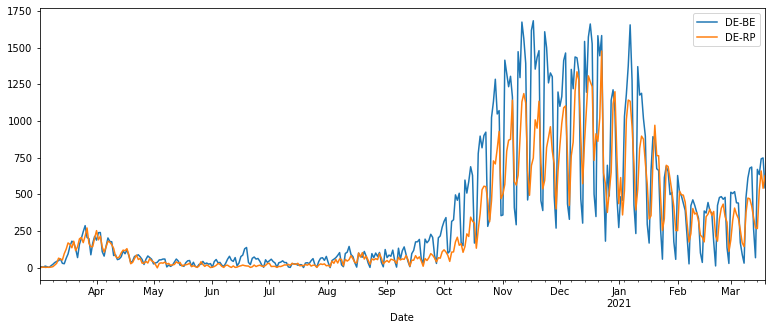

In [ ]:
viz('DE-BE','DE-RP')

Thuringia (DE-TH) and Brandenburg (DE-BB)

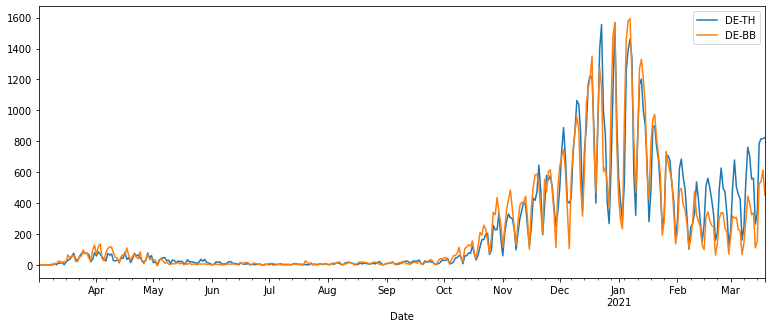

In [ ]:
viz('DE-TH','DE-BB')

Saxony-Anhalt (DE-ST) and Hamburg (DE-HH)

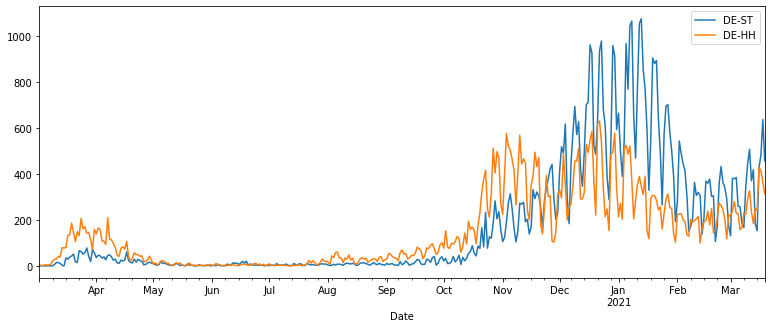

In [ ]:
viz('DE-ST','DE-HH')

Schleswig-Holstein (DE-SH) and Saarland (DE-SL)

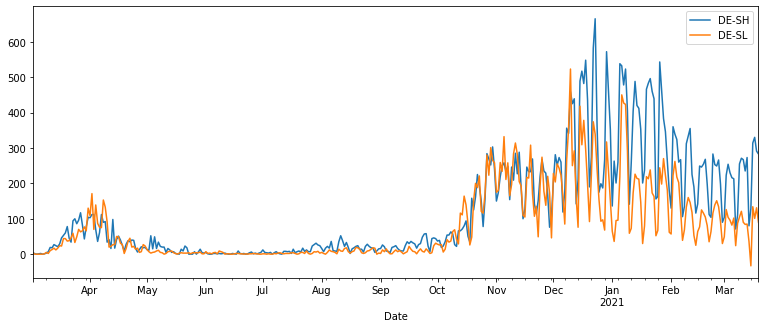

In [ ]:
viz('DE-SH','DE-SL')

Mecklenburg-Vorpommern (DE-MV) and Bremen (D-HB)

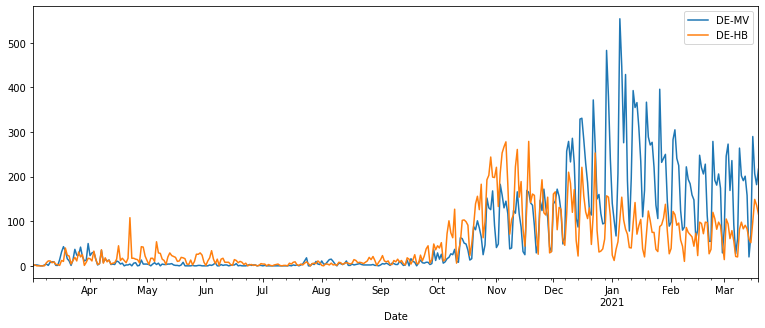

In [ ]:
viz('DE-MV','DE-HB')

In [ ]:
def conv(df):
    s=list()
    cols=df.columns
    for i in range(4):
      s+=list(df[cols[i]])
    return s

In [ ]:
np.random.seed(16000)
dataNew=pd.DataFrame({'Dense1':random.sample(conv(df1[['DE-BE','DE-HB','DE-NW','DE-HH']]), 10),
                      'Dense2':random.sample(conv(df1[['DE-SL','DE-BW','DE-HE','DE-SN']]), 10),
                      'Dense3':random.sample(conv(df1[['DE-RP','DE-BY','DE-SH','DE-NI']]), 10),
                      'Dense4':random.sample(conv(df1[['DE-TH','DE-ST','DE-BB','DE-MV']]), 10)})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 4 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 4 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 4 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 4 for `bw_method`, but please see the docs for the new parameters and

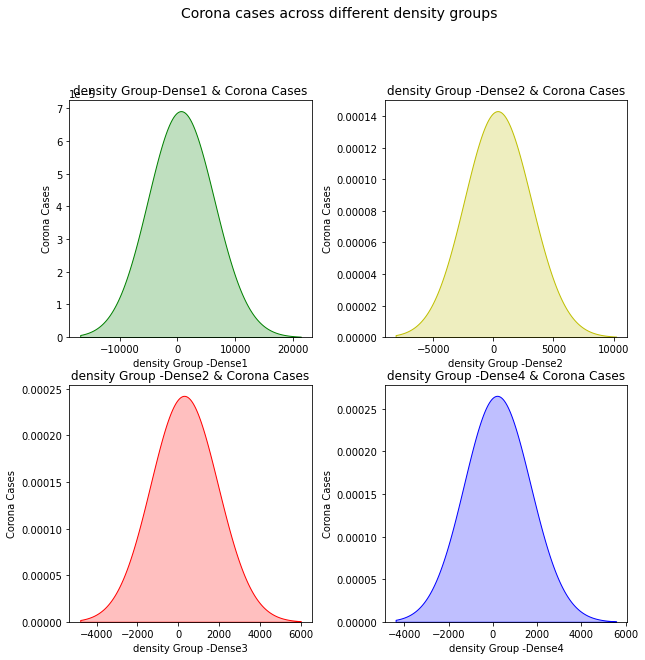

In [ ]:

#Plot number of Corona cases across different density groups to check their distribution.
fig = plt.figure(figsize=(10,10))
title = fig.suptitle("Corona cases across different density groups", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("density Group-Dense1 & Corona Cases")
ax1.set_xlabel("density Group -Dense1")
ax1.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense1'], ax=ax1, shade=True,bw=4, color='g')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense2")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense2'], ax=ax2, shade=True,bw=4, color='y')

ax2 = fig.add_subplot(2,2,3)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense3")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense3'], ax=ax2, shade=True,bw=4, color='r')

ax2 = fig.add_subplot(2,2,4)
ax2.set_title("density Group -Dense4 & Corona Cases")
ax2.set_xlabel("density Group -Dense4")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense4'], ax=ax2, shade=True,bw=4, color='b')

In [ ]:
F, p = stats.f_oneway(dataNew['Dense1'],dataNew['Dense2'],dataNew['Dense3'],dataNew['Dense4'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=0.617, p=0.608
